<a href="https://colab.research.google.com/github/Kunbao2006/2019DataScienceCourse/blob/master/20191015_04_APIs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APIs

In [0]:
import pandas as pd

Before we jump into APIs, we need to talk about one more structure in Python that we haven't covered yet: <b>dictionaries</b>

## Dictionaries

Dictionaries consist of key:value pairs. We can look up a key, and find its value.

The python structures we've used so far (lists, strings, etc.) are all ordered from left to right - we use indexing to access data stored in different places. Dictionaries are different and are unordered. Instead, they use mapping to allow us to access data stored.

In [5]:
my_dictionary={}
print (my_dictionary)
my_dictionary["apple"] = 5
my_dictionary["orange"] = 12
my_dictionary["banana"] = 33
my_dictionary["pear"] = 7
print(my_dictionary)
print(my_dictionary["pear"])

{}
{'apple': 5, 'orange': 12, 'banana': 33, 'pear': 7}
7


In [6]:
my_dictionary.keys()

dict_keys(['apple', 'orange', 'banana', 'pear'])

In [8]:
for i in my_dictionary:
  print(i,"\t:",my_dictionary[i])

apple 	: 5
orange 	: 12
banana 	: 33
pear 	: 7


In [0]:
myDic = {"abc":[{1:2,13:2332},{"Dssd":1231,"ffdd":13213}],"afA":{"FAFA":12}}

In [14]:
myDic["abc"][0][13]

2332

<p><b>Interacting with Dictionaries</b></p>
Just creating dictionaries isn't enough. We want to be able to dynamically interact and update dictionary values. Just like strings, lists and dataframes, there are a number of ways we can interact and manipulate dictionaries.

In [19]:
dictionary = {}
dictionary["drinks"] = ["kopi","teh","milo"]
dictionary["open"] = True
dictionary["fruitStock"] = {"banana":13,"orange":10,"apple":19}

print(dictionary)
print(dictionary["fruitStock"]["apple"])


{'drinks': ['kopi', 'teh', 'milo'], 'open': True, 'fruitStock': {'banana': 13, 'orange': 10, 'apple': 19}}
19


### <font color="red">Exercise 5: Dictionaries

Write a function that accepts a string and stores the frequency of each letter that appears. Print out the results afterwards. For example, inputing the string <b>`'HELLO'`</b> into the function would return:

<p>{'E': 1, 'H': 1, 'L': 2, 'O': 1}</p>

### <font color="red">Exercise 6: Dictionaries

Write a function that accepts an integer, n, and generates a dictionary that with key-value pairs of (i, i*i) for every number between 1 and n (both included). The program should print the dictionary.

For example, if the integer 8 is passed into the function, then the output should be:
<p>{1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64}</p>

# APIs

#### Challenge:
We want to create a visualisation using live weather data. For this, we’ll use Particulate Matter 2.5 readings from data.gov.sg.

When we were using data.gov.sg data to plot using matplotlib, we downloaded a CSV file. But this requires manual interaction. Every time we want updated info, we have to manually go to the website and download the most recent CSV. Is there a way to automate this?

#### Intro to APIs

If I wanted to ask someone what the weather was, I might ask them "Hey, what's the weather today?" or "How’s the weather?" or "Is it hot today?" and you’d know I’m asking about the weather.

But computers talk to one another in a slightly different way: by exchanging data in nicely-formatted data packets.  These have to be properly formatted so that computers can recognise them, just like with your Python syntax. As a result, we need to be very specific when sending requests to computers. It also means that they're going to send responses in very specific formats.

(See slides for more info!)






Some notes on APIs: 

* Computers that are online--servers--can choose what information they want to provide.
* Servers can require registration and user access keys, to identify and protect against unwanted behaviour.
* The information can be requested through a series of "calls", e.g. "hey, can I have the weather today in Singapore?"
* The information provided should be in a format recognisable to both ends, e.g. "31 degrees Celsius, sunny conditions" or "31, sunny". 
* Often, the request is through a URL, e.g. `getweather.com/request/singapore/today`
* Often, the reply is in pre-formatted XML or JSON, e.g. `{temperature: 31, condition: sunny}`

This request-reply mechanism is known as an API, an **Application Programming Interface**. Lots and lots of services provide APIs, so that people can make things with them, e.g.

* [Google Maps APIs](https://developers.google.com/maps/) for people to make property price mashups
* [Singapore Government APIs](https://www.data.gov.sg) for public information the government wants to share
* [Facebook APIs](https://developers.facebook.com/) so you can build off people's social networks
* [Chuck Norris API](http://www.icndb.com/api/) so... umm. We don't know why this exists.


#### Using the data.gov.sg API

In [0]:
# Create an empty pandas DataFrame
dataFrame = pd.DataFrame()

# Import the modules
import urllib.request
import json

# Create a request
url = "https://api.data.gov.sg/v1/environment/pm25?date=2018-01-24"
request = urllib.request.Request(url)

# Get the response and store it
response = urllib.request.urlopen(request)

# response is also an object with various methods/attributes
data = response.read()

#Decode the bytes object
json_string = data.decode('utf-8')

# Convert the JSON data to a Python dictionary
parsed_json = json.loads(json_string)

# Print
parsed_json
print(parsed_json.keys())
print(parsed_json["api_info"])
print(parsed_json["region_metadata"])

print("\n")
for i in parsed_json["region_metadata"]:
  part = i["name"]
  location = i["label_location"]
  lon = location["longitude"]
  lat = location["latitude"]
  print(part,"\tLatitude:",lat,"\tLongitude",lon)
print("\n")




print(parsed_json["items"])
print("\n")
print(parsed_json["items"][0])
print("\n")
print(parsed_json["items"][0].keys())
print("\n")
print(parsed_json["items"][0]["timestamp"])


In [76]:
:totalNo = 0
totalPmi = 0

for i in parsed_json["items"]:
  pmi = i["readings"]["pm25_one_hourly"]["south"]
  #print(pmi)
  totalPmi += pmi
  totalNo += 1

#print (totalPmi)
avgPmi = totalPmi/totalNo
print(avgPmi)

9.652173913043478


In [164]:
#You can also do this on a single line...

print(sum(item["readings"]["pm25_one_hourly"]["south"] for item in json.loads(urllib.request.urlopen(urllib.request.Request("https://api.data.gov.sg/v1/environment/pm25?date=2018-01-24")).read().decode('utf-8'))["items"]) / len(parsed_json["items"]))

#...but don't!

9.652173913043478


In [0]:
data_west = []
data_east = []
data_central = []
data_south = []
data_north = []


timestamps = []  
print("\n")
for i in parsed_json["items"]:
  timestamps.append(i["timestamp"])
  print(i)

  print(i["readings"]["pm25_one_hourly"].keys())
  for index in i["readings"]["pm25_one_hourly"].keys():
    print (i["readings"]["pm25_one_hourly"][index])
    exec("data_{0}.append(i['readings']['pm25_one_hourly'][{0}])".format(index))

#for i in continents:
  #exec("data_%s = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/T4 Data Analysis /Original/gdp_'+i+'.csv', index_col='country')" % i)
  #exec("print(data_%s.head())" % i) # to check if data is correctly imported
  #exec("print(len(data_%s))" % i)

print("\n")

dataFrame["TimeStamp"] = timestamps
print (dataFrame)

9.652173913043478


In [167]:
data  = pd.DataFrame()

#pd.DataFrame(parsed_json["items"][0]["readings"]).T

for dictionary in parsed_json["items"]:
  tempdf = pd.DataFrame(dictionary["readings"]).T
  time = str(int(dictionary["timestamp"][11:13])%12) if int(dictionary["timestamp"][11:13])%12 != 0 else "12"
  clock = "am" if int(dictionary["timestamp"][11:13])//12 == 0 else "pm"
  tempdf.index = [time + clock]
  data = data.append(tempdf)

columns = []
for i in data.columns:
  columns.append(i.capitalize())

#print (columns)
data.columns = columns
data

,Central,East,North,South,West
1am,7,9,8,6,6
2am,8,16,12,12,4
3am,11,11,13,18,6
4am,6,7,6,14,10
5am,4,9,6,5,4
6am,6,16,10,5,9
7am,4,17,9,6,4
8am,6,12,12,7,5
9am,5,7,7,2,4
10am,6,13,11,5,10


In [165]:
# 1. Create an empty dataframe
data = pd.DataFrame()

# 2. First try to append a single hour of data
# pd.DataFrame(parsed_json["items"][0]["readings"]).T

# 3. Once you're able to append a single row of data
#    try to extend that (e.g. loop through) for all the hours
for dictionary in parsed_json["items"]:
    tempdf = pd.DataFrame(dictionary["readings"]).T
    tempdf.index = [dictionary["timestamp"]]
    data = data.append(tempdf)
    
data

,central,east,north,south,west
2018-01-24T01:00:00+08:00,7,9,8,6,6
2018-01-24T02:00:00+08:00,8,16,12,12,4
2018-01-24T03:00:00+08:00,11,11,13,18,6
2018-01-24T04:00:00+08:00,6,7,6,14,10
2018-01-24T05:00:00+08:00,4,9,6,5,4
2018-01-24T06:00:00+08:00,6,16,10,5,9
2018-01-24T07:00:00+08:00,4,17,9,6,4
2018-01-24T08:00:00+08:00,6,12,12,7,5
2018-01-24T09:00:00+08:00,5,7,7,2,4
2018-01-24T10:00:00+08:00,6,13,11,5,10


#### Try it out:
Can you find the average of the PM25 hourly readings in the South on Dec 31, 2017?

In [0]:
#Hint:
#    Step 1: Get all the south readings for 31 Dec
#    Step 2: Average them

### <font color="red">Bonus Exercise:</font>

Can you convert the JSON data into a dataframe so that it's easier to work with? Let's assume we only care about the timestamps and the PM2.5 readings for the 5 regions at each timestamp.


## Putting It All Together - APIs, Plot.ly, and Mapbox

1. Request the latest Particulate Matter 2.5 readings from data.gov.sg. Store the returned data in a python dictionary (hint: don’t specify a date to get current data)

2. Plot the longitude and latitude coordinates of the five locations on a map of Singapore using Plotly and Mapbox. (Your code should read the longitude and latitude coordinates directly from the response data; coordinates should not be hardcoded.)

3. Add hover text that displays:
    - the location name (north, east, central, etc.)
    - the current PM reading for that location.


## Stock APIs

This exercise will go through the following:

* Reading financial data from online sources
* Basic dataframe and series manipulation
* Basic plotting
* Exporting to Excel

My Alpha Vantage API key: ZMA17LILDY2LTF9B


In [0]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [171]:
# Import the modules
import urllib.request
import json
# Create a request
url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&outputsize=full&apikey=H74WYZ182MDD0055"
request = urllib.request.Request(url)
# request is an object with various methods/attributes
request.add_header('api-key', 'BS2mysYRPHmA52SUlZW9G9kHdDKN3rBS')

# Get the response and store it
response = urllib.request.urlopen(request)
# response is also an object with various methods/attributes
data = response.read()
# Convert it to a Python dictionary
parsed_json = json.loads(data.decode('utf-8'))

parsed_json

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'MSFT',
  '3. Last Refreshed': '2019-10-14',
  '4. Output Size': 'Full size',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2019-10-14': {'1. open': '139.6900',
   '2. high': '140.2800',
   '3. low': '139.5249',
   '4. close': '139.5500',
   '5. volume': '10437494'},
  '2019-10-11': {'1. open': '140.1200',
   '2. high': '141.0300',
   '3. low': '139.5000',
   '4. close': '139.6800',
   '5. volume': '25446000'},
  '2019-10-10': {'1. open': '138.4900',
   '2. high': '139.6700',
   '3. low': '138.2500',
   '4. close': '139.1000',
   '5. volume': '17654600'},
  '2019-10-09': {'1. open': '137.4600',
   '2. high': '138.7000',
   '3. low': '136.9700',
   '4. close': '138.2400',
   '5. volume': '19749900'},
  '2019-10-08': {'1. open': '137.0800',
   '2. high': '137.7600',
   '3. low': '135.6200',
   '4. close': '135.6700',
   '5. volume': '25550500'},
  '2019-10-07': {'1. open': '1

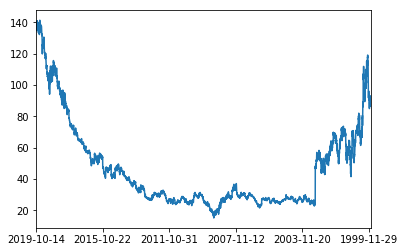

In [174]:
import matplotlib
%matplotlib inline
data1 = pd.DataFrame(parsed_json["Time Series (Daily)"]).T
#plot one of the columns
pd.to_numeric(data1["4. close"]).plot()





## DataReader

Pandas has it's own **DataReader** function, from the **`pandas_datareader`** module, which makes it easy to read data (e.g. historical stock price data) from the following online sources, and to save them as DataFrames:

* Yahoo Finance _(only allows user downloads, not automated requests)_
* Google Finance _(discontinued as of Sept 2017)_
* St.Louis FED (FRED)
* World Bank
* Enigma
* Quandl        
* Kenneth French’s data library
* OECD
* Eurostat
* Thrift Savings Plan
* Nasdaq Trader symbol definitions
* Alpha

More information, including tutorials to access each of these sites, can be found at the [pandas documentation page](http://pandas.pydata.org/pandas-docs/stable/remote_data.html). 

The downsides, however, are that:
* many of these sites have been changing and no longer offer data (for example, Yahoo and Google both recently shut down their APIs)
* sites return different formats of data of varying levels of completeness.
* it requires you to install the pandas-datareader module

There are actually a lot of different modules that individuals have written and posted online. Oftentimes they're looking for an easy way to grab stock data for their own means and share their resulting code on github. These code snippets can be really useful! But they might not be maintained, and they could have specifically tailored solutions that might not be relevant to you.

Because pandas-datareader requires an extra install, and requires learning additional functions, we're not going to use that method (but know that it exists if you're interested in it!). Instead, we're going to use a free stock info service called Alpha Vantage (https://www.alphavantage.co/). You can get a free API key which allows you to access their stock info. They return data as either a downloadable CSV, or JSON format (just like data.gov.sg!).

Example usage can be found at: https://www.alphavantage.co/documentation/

Here, we'll start by reading Microsoft stock prices for the past two weeks.

<hr>

In [0]:
#Optional Exercises:

### <font color="red">Exercise 1: Get Google Data from Google

Create a variable called `goog` to store Google stock price. Slice the data so that it only looks at the time period from 1 Jan 2016 to 1 June 2017.


### <font color="red">Exercise 2

For your `goog` data between 1 Jan 2016 and 1 June 2017:

* Find the average trading volume
* Find the days which exceed twice its average trading volume (should be 14)

### <font color="red">Exercise 3

For the Google data set:

* Make a new column called "Prev Close", and shift the close data by 1 downwards, i.e. today's "Prev Close" is what was in yesterday's "Close". There's a `.shift()` function you can use for this.
* Add a new column showing the % difference between the current day's open and the previous day's close.
* Group the % difference by integer percentages, and show the counts of these.

For this last one, take a look at the `groupby` command.

### <font color="red">Exercise 4

* Plot the closing prices for AAPL, MSFT, and GOOG in the same graph, normalising for their different scales in a sensible manner.

### <font color="red">Exercise 5: Make your own stock analysis generator

For this final exercise, generate some interesting insight from a basket of stocks, that creates an Excel file automatically for you. Also, have it export a couple of graphs that you can plonk into your PowerPoint presentations!